In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [2]:
train = pd.read_csv("C:\\ezen_tensorflow\\seoul_cctv\\seoul_cctv\\train.csv")
test= pd.read_csv("C:\\ezen_tensorflow\\seoul_cctv\\seoul_cctv\\test.csv")
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### PassengerId - 승객번호
### Survived - 0사망 1생존
### Pclass - 승성권 클래스 1:1등석 2:2등석 3:3등석
### Name - 승객이름
### Sex - 승객성별
### Age - 승객나이
### SibSp - 동반한 형제, 자매, 배우자 수
### Parch -  동반한 부모, 자식수
### Ticket - 티켓의 고유넘버
### Fare - 티켓의 요금
### Cabin - 객실번호
### Embarked  - 승선한 항구명 C: 캠브릿지 Q:퀸즈타운 S:사우스햄프턴

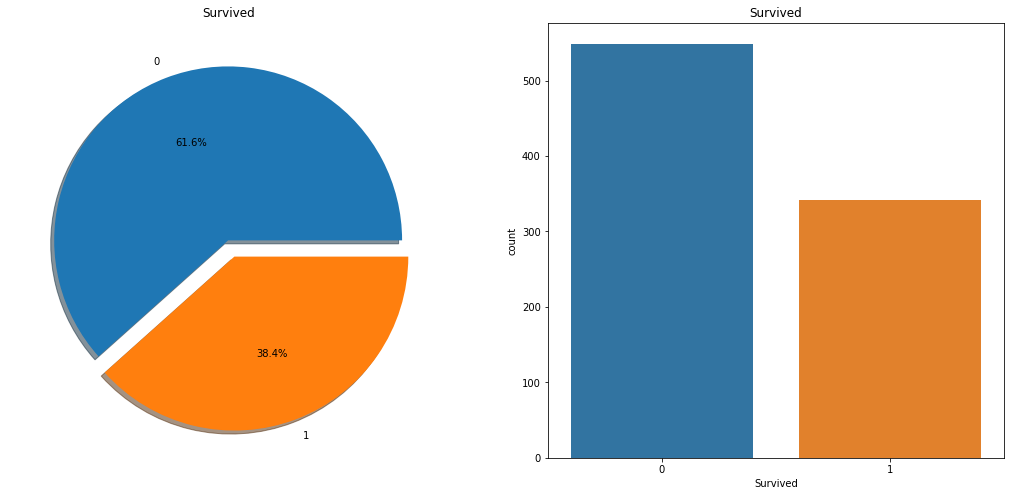

In [5]:
f, ax = plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data= train, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

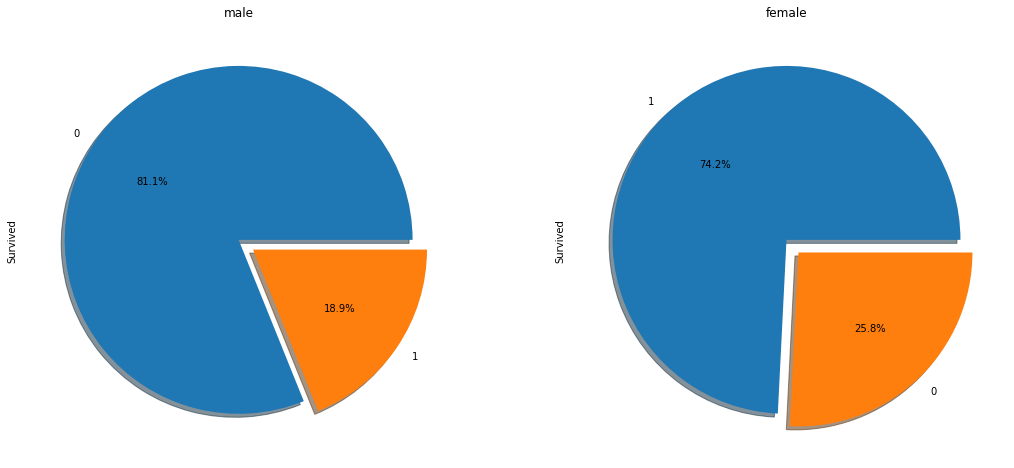

'\n남자의 사망률은 80% 여자의 사망률은 25%\n'

In [6]:
'''
탑승객의 60 % 이상이 사망했음( 0사망, 1생존)
'''

f, ax = plt.subplots(1,2,figsize=(18,8))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('male')
ax[1].set_title('female')
plt.show()

'''
남자의 사망률은 80% 여자의 사망률은 25%
'''



In [7]:
# 성별과 객실 클래스와의 관계시트생성하려고 할 때 crosstab 사용함
df_1 = [train['Sex'], train['Survived']]
df_2 = train['Pclass']
pd.crosstab(df_1, df_2, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [8]:
# 1등객실 여성으 ㅣ생존률은 91/94 = 97%
# 3등객실 여성의 생존률은 50%
# 1등객실 남성의 생존률은 37%
# 3등객실 남성의 생존률은 13%

'\n절반이상의 승객이 사우스햄프턴에서 배를 탓으며 여기에 탑승한 승객의 70% 가량이 남성이었습니다.\n남성의 사망률이 여성보다 훨씬높았으므로 사우스햄프턴에서 탑승한 승객의 사망률이 높게 나왔습니다.\n캠브릿지에서 탑승한 승객들은 1등 객실 승객의 비중 및 생존률이 높은 것으로보아 이동네느 부자동네임을 짐작하게 합니다.\n'

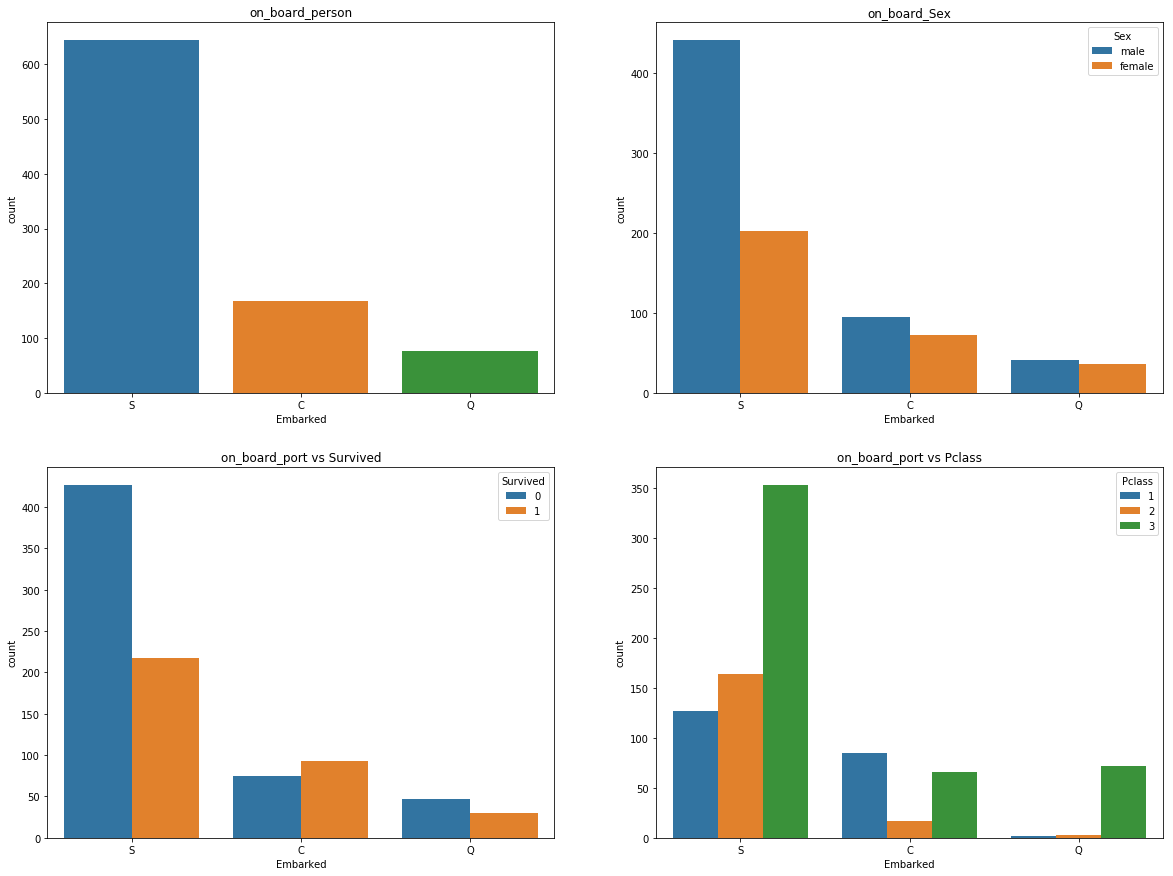

In [9]:
# 배를 탄 항구와의 연관성 추출
f , ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=train, ax = ax[0,0])
ax[0,0].set_title('on_board_person')

sns.countplot('Embarked', hue='Sex', data=train, ax = ax[0,1])
ax[0,1].set_title('on_board_Sex')

sns.countplot('Embarked', hue='Survived', data=train, ax = ax[1,0])
ax[1,0].set_title('on_board_port vs Survived')

sns.countplot('Embarked', hue='Pclass',data=train, ax = ax[1,1])
ax[1,1].set_title('on_board_port vs Pclass')


'''
절반이상의 승객이 사우스햄프턴에서 배를 탓으며 여기에 탑승한 승객의 70% 가량이 남성이었습니다.
남성의 사망률이 여성보다 훨씬높았으므로 사우스햄프턴에서 탑승한 승객의 사망률이 높게 나왔습니다.
캠브릿지에서 탑승한 승객들은 1등 객실 승객의 비중 및 생존률이 높은 것으로보아 이동네느 부자동네임을 짐작하게 합니다.
'''

In [10]:
'''
결과도출을 위한 전처리 pre-processing
모든 요소들의 상관관계를 고려할때, 성별, 객실등급, 탑승항구 세가지 정보를 가지고 생존률을 비교하는 모델을 만드는 것이 합리적이다.
모델을 만들때 가장 우선하는 프로세스는 결측값 제거이다.


'''
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25  

In [11]:
train.isnull().sum()
# Age            177
# Cabin          687
# Embarked         2
# 나이는 생존률에 민감하므로 임의의 데이터로 채운다.
# 객실번호는 임의의 데이터로 산정하기 어렵고 결측치가 너무 많아 제거하로 한다
# 승선한 항구의 결측치는 수가 적으므로 임의의 값으로 대체한다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
sns.set()
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.show()

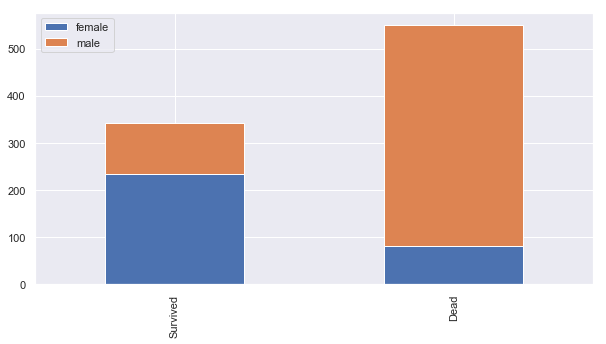

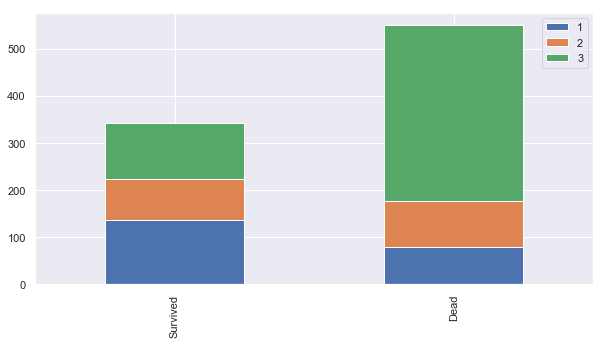

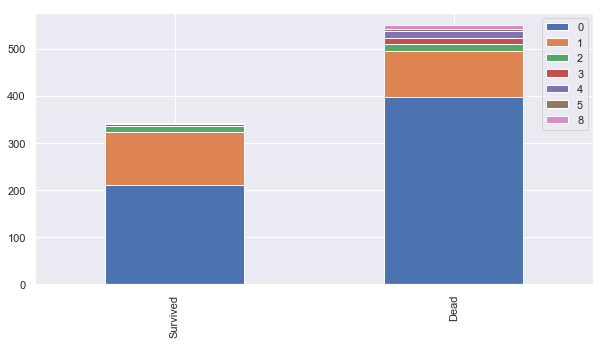

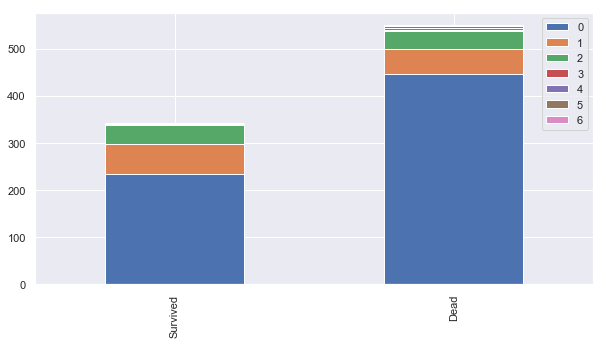

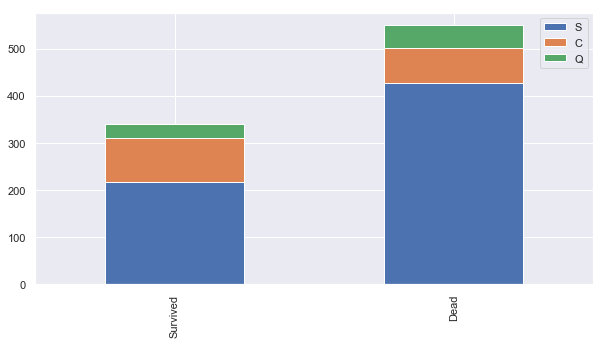

'\nFeature Engineering 은 머신러닝 알고리즘을 작동하기 위해 데이터에 특징을 만드는 과정\n모델의 성능을 높이기 위해 모델에 입력할 데이터를 만들기 위해\n주어진 초기 데이터로부터 특징을 가공하고 생성하는 전체과정을 의미합니다.\n'

In [13]:
bar_chart('Sex')
bar_chart('Pclass') # 사망자는 3등석, 생존자는 1등석
bar_chart('SibSp') # 동반한 형제자매, 배우자수
bar_chart('Parch') # 동반한 부모, 자식수
bar_chart('Embarked') # 승선한 항구 # S, Q 에 탑승한 사람이 더 많이 사망했고, C는 덜 사망했다.


"""
Feature Engineering 은 머신러닝 알고리즘을 작동하기 위해 데이터에 특징을 만드는 과정
모델의 성능을 높이기 위해 모델에 입력할 데이터를 만들기 위해
주어진 초기 데이터로부터 특징을 가공하고 생성하는 전체과정을 의미합니다.
"""

위 정보에서 얻을 수 있는 사실은 아래와 같습니다.
1. Age의 약 20프의 데이터가 Null로 되어있다.
2. Cabin의 대부분 값은 Null이다.
3. Name, Sex, Ticket, Cabin, Embarked는 숫자가 아닌 문자 값이다.
   - 연관성 없는 데이터는 삭제하거나 숫자로 바꿀 예정입니다.
     (머신러닝은 숫자를 인식하기 때문입니다.)
그리고 이를 바탕으로 이렇게 데이터를 가공해 보겠습니다.
1. Cabin과 Ticket 두 값은 삭제한다.(값이 비어있고 연관성이 없다는 판단하에)
2. Embarked, Name, Sex 값은 숫자로 변경할 것 입니다.
3. Age의 Null 데이터를 채워 넣을 것입니다.
4. Age의 값의 범위를 줄일 것입니다.(큰 범위는 머신러닝 분석시 좋지 않습니다.)
5. Fare의 값도 범위를 줄일 것입니다.

In [14]:
# Cabin, Ticket 값 삭제
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)


Embarked 값 가공

In [15]:
s_city = train[train['Embarked']=='S'].shape[0]
print("s : " , s_city) # S:646

c_city = train[train['Embarked']=='C'].shape[0]
print("c : " , c_city) # C:168

q_city = train[train['Embarked']=='Q'].shape[0]
print("q : " , q_city) # Q:77

'''
대부분의 값이 S 이므로 결측값 2개도 S로 채우는것으로 결정
'''


s :  644
c :  168
q :  77


'\n대부분의 값이 S 이므로 결측값 2개도 S로 채우는것으로 결정\n'

In [16]:
train = train.fillna({'Embarked':'S'})
'''
S-1, C-2, Q-3 으로 변경, 머신러닝은 숫자만 인식함
'''

'\nS-1, C-2, Q-3 으로 변경, 머신러닝은 숫자만 인식함\n'

In [17]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [18]:
city_mapping = {"S" : 1, "C" : 2, "Q" : 3}
train['Embarked'] = train['Embarked'].map(city_mapping)
test['Embarked'] = test['Embarked'].map(city_mapping)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,1


In [21]:
# Name 값 가공하기
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([a-zA-Z]+)\.', expand = False)
# ([a-zA-Z]+)\. 은 정규식 []은 글자단위인데 알파벳만 허용함 + 는 한글자이상 \은 글자 뒤에 반드시 점(.)이 옴

In [22]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Mr, Mrs, Miss, Royal, Rare, Master 6개로 줄여봄. 이를 바탕으로 생존률의 평균을 살펴봄

In [23]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess','Sir','Lady'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

In [24]:
train[['Title','Survived']].groupby(['Title'], as_index = False).mean()
# 이데이터를 바탕으로 1~6까지의 숫자로 매핑함

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [25]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6 }

In [26]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Royal': 5, 'Rare': 6, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}

In [27]:
for dataset in combine:
    dataset['Title']= dataset['Title'].map(title_mapping)
    dataset['Title']= dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [28]:
train = train.drop(['Name','PassengerId'], axis = 1)
test = test.drop(['Name','PassengerId'], axis = 1)
train = train.drop(['Age','Fare'], axis = 1)
test = test.drop(['Age','Fare'], axis = 1)
combine =[train, test]
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title
0,0,3,male,1,0,1,1
1,1,1,female,1,0,2,3
2,1,3,female,0,0,1,2
3,1,1,female,1,0,1,3
4,0,3,male,0,0,1,1


In [29]:
sex_mapping = {'male':0, 'female':1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title
0,0,3,0,1,0,1,1
1,1,1,1,1,0,2,3
2,1,3,1,0,0,1,2
3,1,1,1,1,0,1,3
4,0,3,0,0,0,1,1


In [31]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 6), (891,))

In [32]:
train.info

<bound method DataFrame.info of      Survived  Pclass  Sex  SibSp  Parch  Embarked  Title
0           0       3    0      1      0         1      1
1           1       1    1      1      0         2      3
2           1       3    1      0      0         1      2
3           1       1    1      1      0         1      3
4           0       3    0      0      0         1      1
5           0       3    0      0      0         3      1
6           0       1    0      0      0         1      1
7           0       3    0      3      1         1      4
8           1       3    1      0      2         1      3
9           1       2    1      1      0         2      3
10          1       3    1      1      1         1      2
11          1       1    1      0      0         1      2
12          0       3    0      0      0         1      1
13          0       3    0      1      5         1      1
14          0       3    1      0      0         1      2
15          1       2    1      0      0

현재 train 의정보가 최종모델의 모습
NaN이 없음 전부 숫자값으로 매핑된 상황

### 예측모델 생성 및 결과 제출

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import svc

ImportError: cannot import name 'svc'